In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
trans=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
newcust=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')
custdem=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
custadd=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [2]:
trans

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [3]:
trans.columns = trans.iloc[0]
trans = trans[1:]
newcust.columns = newcust.iloc[0]
newcust = newcust[1:]
custdem.columns = custdem.iloc[0]
custdem = custdem[1:]
custadd.columns = custadd.iloc[0]
custadd = custadd[1:]

In [4]:
#                                                         **************transactions table**************

In [5]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [7]:
trans["transaction_id"] = trans["transaction_id"].astype(str).astype(int)
trans["product_id"] = trans["product_id"].astype(str).astype(int)
trans["customer_id"] = trans["customer_id"].astype(str).astype(int)

In [8]:
trans["list_price"] = trans["list_price"].astype(str).astype(float)
trans["standard_cost"] = trans["standard_cost"].astype(str).astype(float)
trans["product_first_sold_date"] = trans["product_first_sold_date"].astype(str).astype(float)

In [9]:
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='s')
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format = '%Y-%m-%d %H:%M:%S')
trans['product_first_sold_date'].head()

1   1970-01-01 11:27:25
2   1970-01-01 11:35:01
3   1970-01-01 10:06:01
4   1970-01-01 10:02:25
5   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [10]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [11]:
trans.isna().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [12]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [13]:
print(trans['online_order'].unique())
print(trans['order_status'].unique())
print(trans['brand'].unique())
print(trans['product_line'].unique())
print(trans['product_class'].unique())
print(trans['product_size'].unique())

[False True nan]
['Approved' 'Cancelled']
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
['Standard' 'Road' 'Mountain' 'Touring' nan]
['medium' 'low' 'high' nan]
['medium' 'large' 'small' nan]


In [14]:
trans.dropna(inplace=True)

In [15]:
trans.isna().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
cols = ['online_order', 'order_status', 'brand', 'product_line','product_class','product_size']
trans[cols] = trans[cols].apply(LabelEncoder().fit_transform)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,0,0,3,2,2,1,71.49,53.62,1970-01-01 11:27:25
2,2,3,3120,2017-05-21,1,0,4,2,2,0,2091.47,388.92,1970-01-01 11:35:01
3,3,37,402,2017-10-16,0,0,2,2,1,1,1793.43,248.82,1970-01-01 10:06:01
4,4,88,3135,2017-08-31,0,0,1,2,2,1,1198.46,381.10,1970-01-01 10:02:25
5,5,78,787,2017-10-01,1,0,0,2,2,0,1765.30,709.48,1970-01-01 11:43:46


In [17]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,0.008845,2.535613,1.819131,1.546927,0.942299,1107.337193,555.585260
std,5779.669087,30.571996,1011.889153,0.500012,0.093636,1.687329,0.562074,0.742598,0.583197,582.662400,405.596541
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.010000,7.210000
25%,4976.000000,18.000000,857.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,575.270000,215.140000
50%,9985.000000,45.000000,1741.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1163.890000,507.580000
75%,14997.000000,72.000000,2615.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.000000,5034.000000,1.000000,1.000000,5.000000,3.000000,2.000000,2.000000,2091.470000,1759.850000


In [18]:
trans.duplicated().sum()

0

In [19]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,0,0,3,2,2,1,71.49,53.62,1970-01-01 11:27:25
2,2,3,3120,2017-05-21,1,0,4,2,2,0,2091.47,388.92,1970-01-01 11:35:01
3,3,37,402,2017-10-16,0,0,2,2,1,1,1793.43,248.82,1970-01-01 10:06:01
4,4,88,3135,2017-08-31,0,0,1,2,2,1,1198.46,381.10,1970-01-01 10:02:25
5,5,78,787,2017-10-01,1,0,0,2,2,0,1765.30,709.48,1970-01-01 11:43:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,1,0,2,2,0,1,2005.66,1203.40,1970-01-01 10:30:23
19997,19997,41,127,2017-11-09,1,0,3,1,2,1,416.98,312.74,1970-01-01 09:52:40
19998,19998,87,2284,2017-04-14,1,0,2,2,2,1,1636.90,44.71,1970-01-01 11:13:30
19999,19999,6,2764,2017-07-03,0,0,2,2,0,1,227.88,136.73,1970-01-01 10:36:56


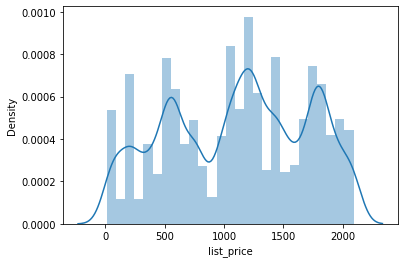

In [46]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(trans['list_price'])

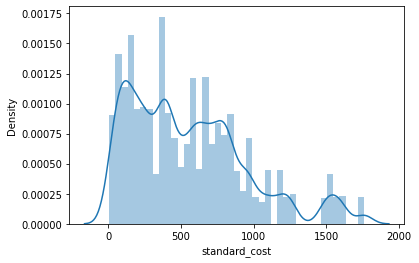

In [47]:
sns.distplot(trans['standard_cost'])

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

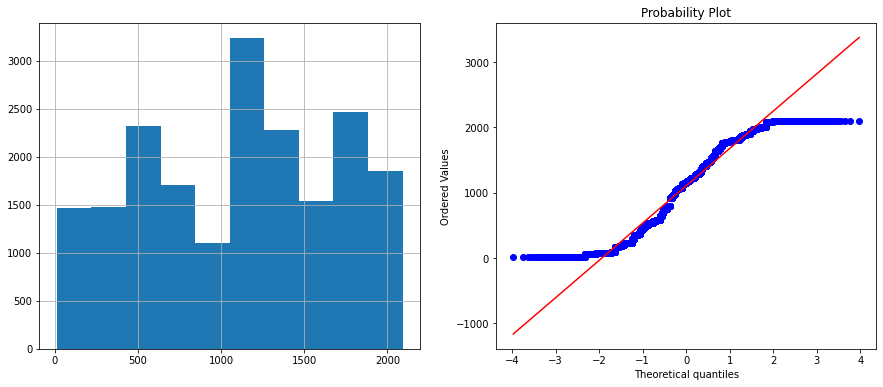

In [49]:
diagnostic_plots(trans, 'list_price')

Optimal lambda:  0.8230822550198819


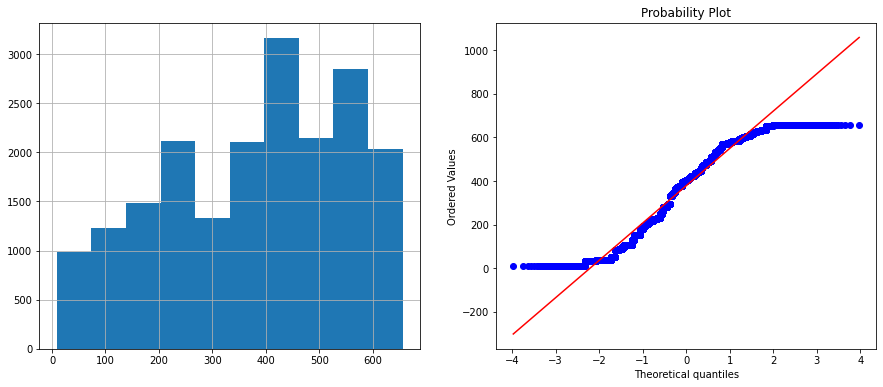

In [50]:
trans['bc_list_price'], param = stats.boxcox(trans.list_price+1) # you can vary the exponent as needed
print('Optimal lambda: ', param)
diagnostic_plots(trans, 'bc_list_price')

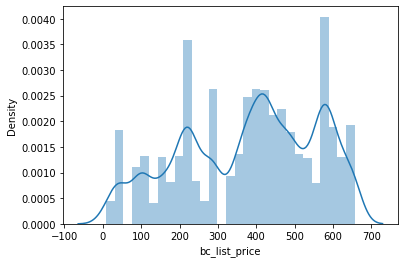

In [52]:
sns.distplot(trans['bc_list_price'])

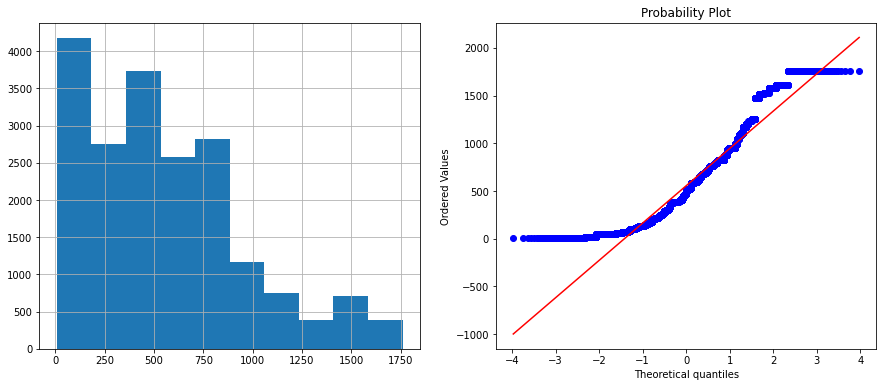

In [53]:
diagnostic_plots(trans, 'standard_cost')

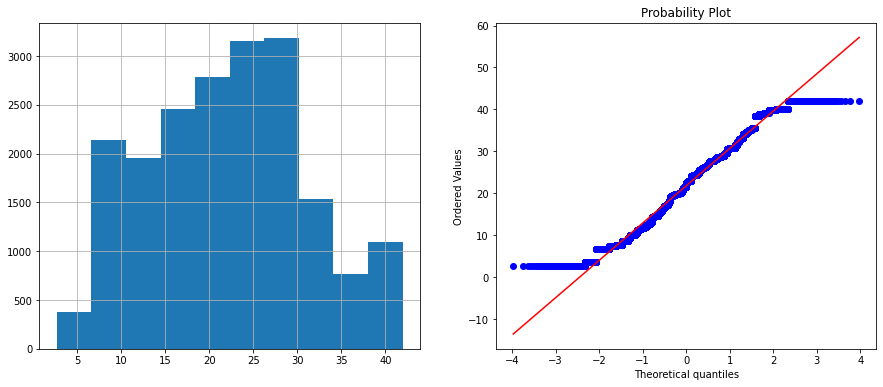

In [54]:
trans['sq_standard_cost']=trans['standard_cost']**(1/2)
diagnostic_plots(trans,'sq_standard_cost')

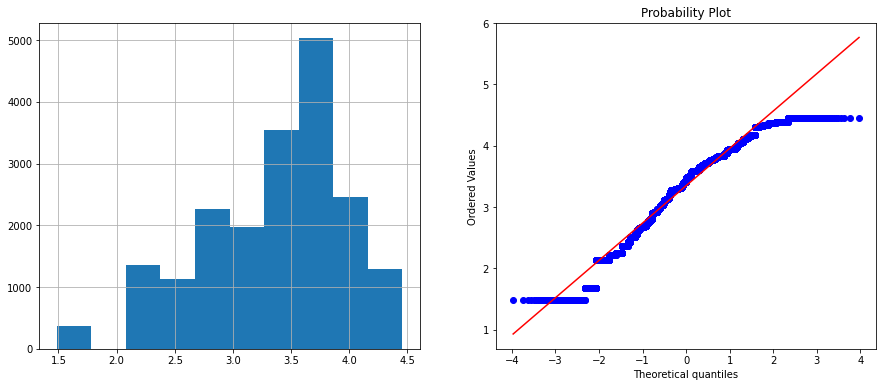

In [55]:
trans['ex_standard_cost']=trans['standard_cost']**(1/5)
diagnostic_plots(trans,'ex_standard_cost')

Optimal lambda:  0.4181302189341507


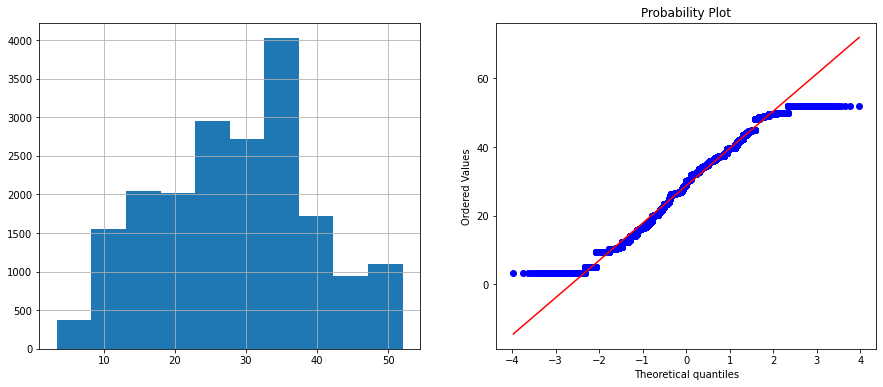

In [56]:
trans['bc_standard_cost'], param = stats.boxcox(trans.standard_cost+1) # you can vary the exponent as needed
print('Optimal lambda: ', param)
diagnostic_plots(trans, 'bc_standard_cost')

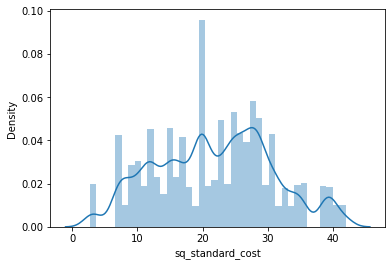

In [57]:
sns.distplot(trans['sq_standard_cost'])

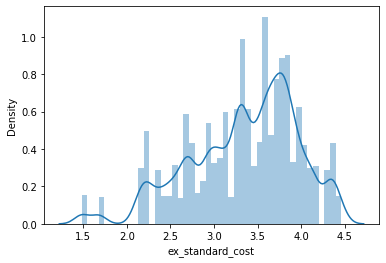

In [58]:
sns.distplot(trans['ex_standard_cost'])

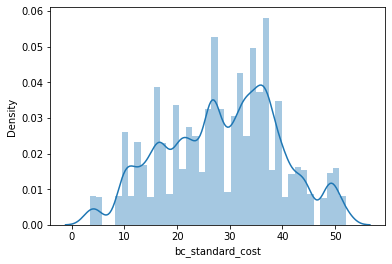

In [59]:
sns.distplot(trans['bc_standard_cost'])

In [ ]:
#                                                         **************new customers table**************

In [20]:
newcust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [21]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [22]:
newcust["past_3_years_bike_related_purchases"] = newcust["past_3_years_bike_related_purchases"].astype(str).astype(int)
newcust["tenure"] = newcust["tenure"].astype(str).astype(int)
newcust["postcode"] = newcust["postcode"].astype(str).astype(int)
newcust["property_valuation"] = newcust["property_valuation"].astype(str).astype(int)
newcust["Rank"] = newcust["Rank"].astype(str).astype(int)
newcust["Value"] = newcust["Value"].astype(str).astype(float)

In [23]:
newcust['DOB'] = pd.to_datetime(newcust['DOB'], format = '%Y-%m-%d %H:%M:%S')

In [24]:
newcust.dtypes

0
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [25]:
newcust.isna().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [26]:
newcust.dropna(inplace=True)

In [27]:
newcust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object', name=0)

In [28]:
print(newcust['gender'].unique())
print(newcust['job_industry_category'].unique())
print(newcust['wealth_segment'].unique())
print(newcust['deceased_indicator'].unique())
print(newcust['state'].unique())
print(newcust['country'].unique())

['Male' 'Female']
['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Health' 'Argiculture' 'Telecommunications']
['Mass Customer' 'Affluent Customer' 'High Net Worth']
['N']
['QLD' 'NSW' 'VIC']
['Australia']


In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['deceased_indicator','job_title','gender', 'job_industry_category', 'wealth_segment','state','owns_car']
newcust[cols] = newcust[cols].apply(LabelEncoder().fit_transform)
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,1,86,1957-07-12,69,5,2,0,1,14,45 Shopko Center,4500,1,Australia,6,1,1.718750
2,Morly,Genery,1,69,1970-03-22,157,6,2,0,0,16,14 Mccormick Park,2113,0,Australia,11,1,1.718750
3,Ardelis,Forrester,0,10,1974-08-28,133,2,0,0,0,10,5 Colorado Crossing,3505,2,Australia,5,1,1.718750
4,Lucine,Stutt,0,64,1979-01-28,3,5,0,0,1,5,207 Annamark Plaza,4814,1,Australia,1,4,1.703125
5,Melinda,Hadlee,0,34,1965-09-21,66,2,0,0,0,19,115 Montana Place,2093,0,Australia,9,4,1.703125


In [30]:
newcust.describe()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,Rank,Value
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.0,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,0.483916,49.806993,86.495105,3.839161,1.264336,0.0,0.488112,11.349650,3033.420979,0.783217,7.386014,507.942657,0.873785
std,0.500091,27.735227,49.383152,2.001576,0.824214,0.0,0.500209,5.011274,851.685794,0.849616,2.830274,290.855597,0.296971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2000.000000,0.000000,1.000000,1.000000,0.340000
25%,0.000000,27.000000,42.500000,2.000000,1.000000,0.0,0.000000,7.000000,2212.500000,0.000000,6.000000,252.000000,0.637500
50%,0.000000,51.000000,88.000000,3.000000,2.000000,0.0,0.000000,11.000000,3013.000000,1.000000,8.000000,524.000000,0.836719
75%,1.000000,71.500000,132.000000,5.000000,2.000000,0.0,1.000000,15.000000,3855.000000,2.000000,9.000000,760.000000,1.073125
max,1.000000,99.000000,175.000000,8.000000,2.000000,0.0,1.000000,22.000000,4879.000000,2.000000,12.000000,1000.000000,1.718750


In [31]:
newcust.duplicated().sum()

0

In [ ]:
#                                                         **************customer demographics table**************

In [32]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [33]:
custdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [34]:
custdem = custdem[custdem['DOB'].notna()]
custdem['DOB'] = pd.to_datetime(custdem['DOB'], format = '%Y-%m-%d %H:%M:%S')
custdem["Age"] = custdem["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

In [35]:
custdem["customer_id"] = custdem["customer_id"].astype(str).astype(int)
custdem["past_3_years_bike_related_purchases"] = custdem["past_3_years_bike_related_purchases"].astype(str).astype(int)
custdem["tenure"] = custdem["tenure"].astype(str).astype(int)
custdem.drop(columns=['default'],inplace=True)
custdem.last_name = custdem.last_name.fillna('')
custdem.reset_index(inplace=True,drop=True)
custdem['gender'].replace('F', 'Female',inplace=True)
custdem['gender'].replace('Femal', 'Female',inplace=True)
custdem = custdem[custdem.gender != 'U']
custdem.dropna(inplace=True)


In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ['deceased_indicator','job_title','gender', 'job_industry_category', 'wealth_segment','owns_car']
custdem[cols] = custdem[cols].apply(LabelEncoder().fit_transform)
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,0,93,1953-10-12,71,3,2,0,1,11,68
1,2,Eli,Bockman,1,81,1980-12-16,19,2,2,0,1,16,41
2,3,Arlin,Dearle,1,61,1954-01-20,133,6,2,0,1,15,67
8,9,Mala,Lind,0,97,1973-03-10,38,0,0,0,1,8,48
9,10,Fiorenze,Birdall,0,49,1988-10-11,151,2,2,0,1,20,33


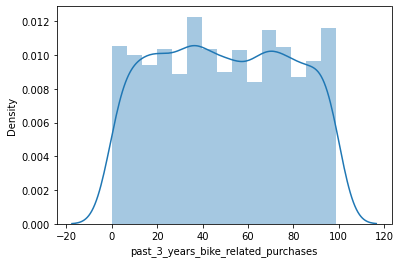

In [62]:
sns.distplot(custdem['past_3_years_bike_related_purchases'])

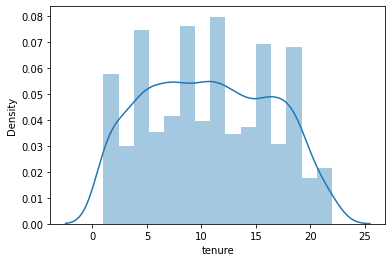

In [63]:
sns.distplot(custdem['tenure'])

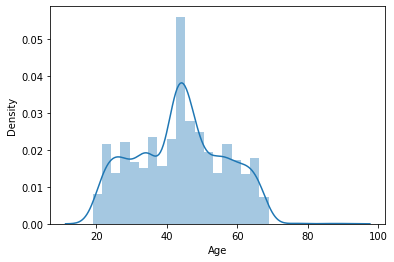

In [64]:
sns.distplot(custdem['Age'])

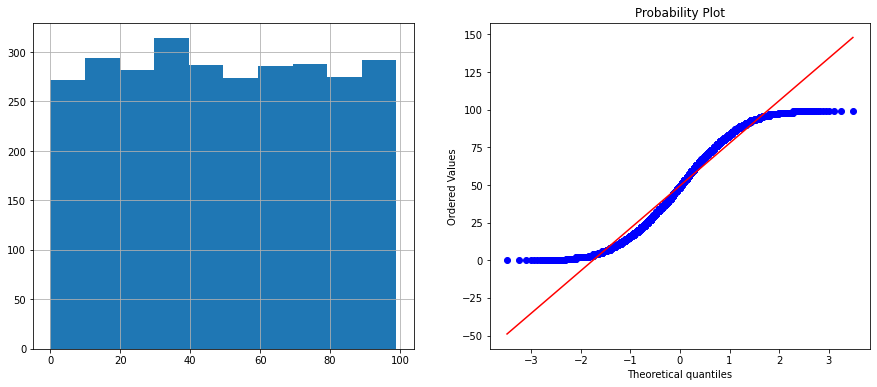

In [ ]:
diagnostic_plots(custdem, 'past_3_years_bike_related_purchases')

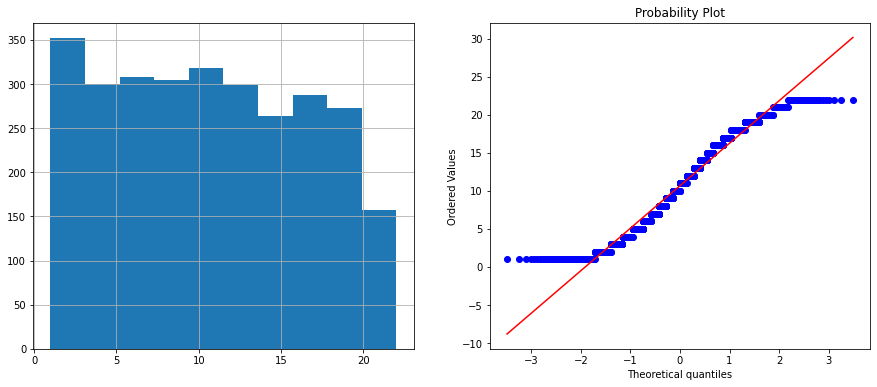

In [ ]:
diagnostic_plots(custdem, 'tenure')

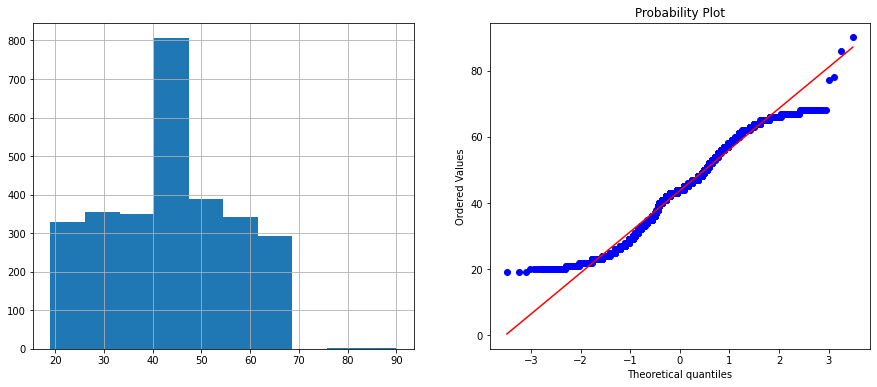

In [ ]:
diagnostic_plots(custdem, 'Age')

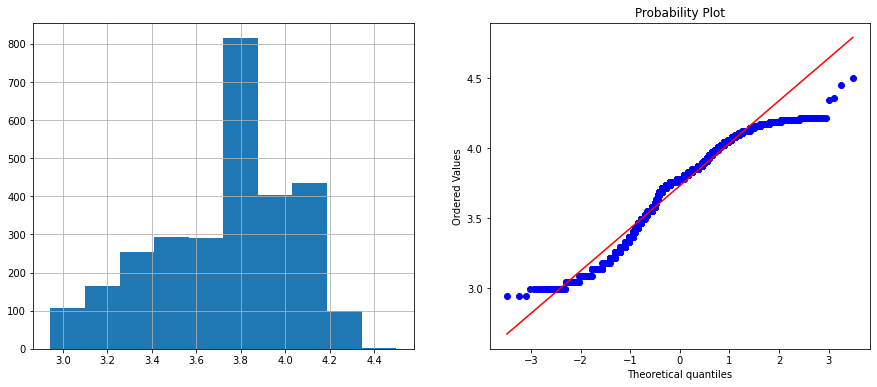

In [70]:

custdem['log_Age'] = np.log(custdem.Age)
diagnostic_plots(custdem, 'log_Age')

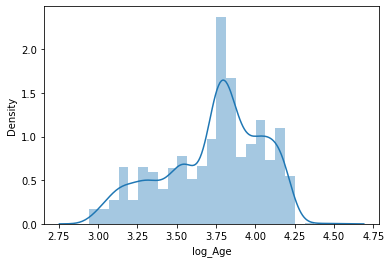

In [71]:
sns.distplot(custdem['log_Age'])

In [ ]:
#                                      **************custadd table**************

In [37]:
custadd

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [38]:
custadd['state'].replace('Victoria', 'VIC',inplace=True)
custadd['state'].replace('New South Wales', 'NSW',inplace=True)

In [39]:
custadd["customer_id"] = custadd["customer_id"].astype(str).astype(int)
custadd["postcode"] = custadd["postcode"].astype(str).astype(int)
custadd["property_valuation"] = custadd["property_valuation"].astype(str).astype(int)

In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ['state']
custadd[cols] = custadd[cols].apply(LabelEncoder().fit_transform)
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,0,Australia,10
2,2,6 Meadow Vale Court,2153,0,Australia,10
3,4,0 Holy Cross Court,4211,1,Australia,9
4,5,17979 Del Mar Point,2448,0,Australia,4
5,6,9 Oakridge Court,3216,2,Australia,9


In [ ]:
#                                                         **************MERGE ALL TABLES TO GET FINAL TABLE**************

In [ ]:
newcust=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')
custdem=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
custadd=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [ ]:
newcust.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312


In [ ]:
newcust.columns = newcust.iloc[0]
newcust = newcust[1:]

In [ ]:
custdem.columns = custdem.iloc[0]
custdem = custdem[1:]
custadd.columns = custadd.iloc[0]
custadd = custadd[1:]

In [ ]:
newcust.dtypes

0
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
Rank                                   object
Value                                  object
dtype: object

In [ ]:
custdem['customer_id'].iloc[-1]

4000

In [ ]:
newcust.insert(0, 'customer_id', range(4001, 4001 + len(newcust)))

In [ ]:
newcust

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
997,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
998,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
999,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [ ]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [ ]:
custadd

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
custdem = pd.merge(custdem, custadd, how='left', on='customer_id')

In [ ]:
custdem.drop(columns=['default'],inplace=True)

In [ ]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19,0 Transport Center,3977,VIC,Australia,6
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1,4 Dovetail Crossing,2350,NSW,Australia,2
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Yes,10,1482 Hauk Trail,3064,VIC,Australia,3


In [ ]:
newcust

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
997,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
998,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
999,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [ ]:
combineddf = pd.concat([custdem, newcust], ignore_index=True, sort=False)

In [ ]:
combineddf

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
4996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
4997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
4998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [ ]:
combineddf.dtypes

customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
Rank                                   object
Value                                  object
dtype: object

In [ ]:
combineddf.isna().sum()

customer_id                               0
first_name                                0
last_name                               154
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     104
job_title                               612
job_industry_category                   821
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                   87
address                                   4
postcode                                  4
state                                     4
country                                   4
property_valuation                        4
Rank                                   4000
Value                                  4000
dtype: int64

In [ ]:
combineddf.Rank.unique()

array([nan, 1, 4, 6, 8, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 26, 30,
       32, 36, 38, 40, 42, 44, 46, 50, 52, 54, 57, 62, 65, 68, 72, 77, 78,
       84, 85, 88, 89, 96, 99, 102, 104, 111, 114, 120, 125, 127, 132,
       133, 142, 144, 146, 152, 153, 154, 155, 157, 158, 163, 166, 173,
       174, 177, 181, 188, 190, 191, 195, 201, 202, 206, 212, 215, 218,
       219, 223, 226, 230, 231, 233, 237, 240, 241, 244, 248, 249, 250,
       252, 259, 271, 274, 278, 282, 284, 285, 287, 289, 291, 295, 297,
       302, 304, 310, 312, 320, 322, 324, 326, 329, 334, 338, 341, 345,
       349, 355, 356, 358, 361, 366, 370, 371, 372, 375, 378, 382, 386,
       395, 396, 401, 405, 408, 409, 414, 415, 418, 419, 420, 427, 429,
       430, 433, 436, 441, 444, 450, 455, 464, 466, 468, 471, 473, 475,
       478, 483, 485, 486, 492, 494, 495, 498, 500, 502, 504, 507, 513,
       515, 520, 524, 526, 529, 530, 536, 544, 546, 549, 551, 552, 555,
       561, 562, 563, 568, 574, 575, 582, 583, 587, 590, 591, 

In [ ]:
combineddf.duplicated().sum()

0